# Wisconsin Breast Cancer Diagnosed
## Programming Language: R
## Data Preprocessing

- Load data and drop last empty column

In [2]:
library(tidyverse)
breast_cancer = read.csv("data.csv")
breast_cancer$X <- NULL
breast_cancer$id <- NULL
head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


- Fix data columns name.
- Turn column "diagnosis" value from M/B to 1/0. It can help us to run the models.

In [3]:
colnames(breast_cancer) <- c('diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst')

mutate(breast_cancer, diagnosis = recode(diagnosis,"M"="1",
                                         "B"="0")) -> breast_cancer

breast_cancer$diagnosis <- as.numeric(breast_cancer$diagnosis)
head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Split data

In [4]:
set.seed(1)
n = nrow(breast_cancer) # 568
z = sample(n, 0.8*n) # 0.8 for train/ 0.2 for test

## Random Forest

- Model default has 5 variables to try at each split.
- Error rate 3.5%

In [5]:
# rule of thumb : m ~= root(p)
p = ncol(breast_cancer) -1 # -diagnosis
p
sqrt(p) # No. of variables tried at each split: 5

[1] 30

[1] 5.477226

In [7]:
library(randomForest)
set.seed(1)
train_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer, subset= z) # -diagnosis
train_RF # error rate: 4.84%


Call:
 randomForest(formula = as.factor(diagnosis) ~ ., data = breast_cancer,      subset = z) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 4.84%
Confusion matrix:
    0   1 class.error
0 279   7  0.02447552
1  15 154  0.08875740

In [8]:
yhat = predict(train_RF, newdata= breast_cancer[-z,], type="class")

table(yhat, breast_cancer$diagnosis[-z])
mean(yhat!= breast_cancer$diagnosis[-z]) # 3.5% error rate.

    
yhat  0  1
   0 70  3
   1  1 40

[1] 0.03508772

## Tuning 

- Try 30 variables, 100 trees at first.
- Get 7% error rate. Worse than before (5 variables, 500 trees)

In [9]:
set.seed(1)
train_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer, subset= z, mtry= 30, ntree= 100)
train_RF # error rate: 4.62%


Call:
 randomForest(formula = as.factor(diagnosis) ~ ., data = breast_cancer,      mtry = 30, ntree = 100, subset = z) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 30

        OOB estimate of  error rate: 4.62%
Confusion matrix:
    0   1 class.error
0 278   8  0.02797203
1  13 156  0.07692308

In [10]:
yhat = predict(train_RF, newdata= breast_cancer[-z,], type="class")

table(yhat, breast_cancer$diagnosis[-z])
mean(yhat!= breast_cancer$diagnosis[-z]) # 7% error rate. get worse than 5 variables,500 trees

    
yhat  0  1
   0 68  5
   1  3 38

[1] 0.07017544

In [11]:
set.seed(1)
n = nrow(breast_cancer)
z = sample(n, n*0.8)

ERRORRATE = rep(0,p) # p = 11 predictors. try every predictors to find the best random forest
optimaltrees = rep(0,p)

for(k in 1:p){
  train_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer[z,], mtry= k)
  optimaltrees[k] = which.min(train_RF$err.rate) # In each variables selection, number with lowest mse = optimal trees.
  
  train_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer[z,], mtry= k, ntree= optimaltrees[k])
  yhat = predict(train_RF, newdata = breast_cancer[-z,])
  
  ERRORRATE[k] = mean(yhat!= breast_cancer$diagnosis[-z])
  #plot(train_RF$err.rate)
}

In [12]:
which.min(ERRORRATE) # 3

[1] 3

In [13]:
optimaltrees[3]
optimaltrees # HOW MANY TREE FOR EACH VARIABLE SPLIT

[1] 559

[1] 687 548 559 700 575 545 612 633 638 524 541 653 827 536 520 529 673 984 532
[20] 541 694 773 652 513 565 890 719 530 630 503

## Fit best random forest model to test

- Compare with 30 variables and 100 trees model
- Get lower error rate. From 7% to 4.38%

In [14]:
# fit best random forest trees
set.seed(1)
best_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer[z,], mtry= 3, ntree= 559) 
best_RF # training 4.62 -> 4.4% error rate


Call:
 randomForest(formula = as.factor(diagnosis) ~ ., data = breast_cancer[z,      ], mtry = 3, ntree = 559) 
               Type of random forest: classification
                     Number of trees: 559
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.4%
Confusion matrix:
    0   1 class.error
0 279   7  0.02447552
1  13 156  0.07692308

In [15]:
yhat = predict(best_RF, newdata= breast_cancer[-z,], type="class")

table(yhat, breast_cancer$diagnosis[-z])
mean(yhat!= breast_cancer$diagnosis[-z]) 
# testing 7% -> 4.38%

    
yhat  0  1
   0 70  4
   1  1 39

[1] 0.04385965

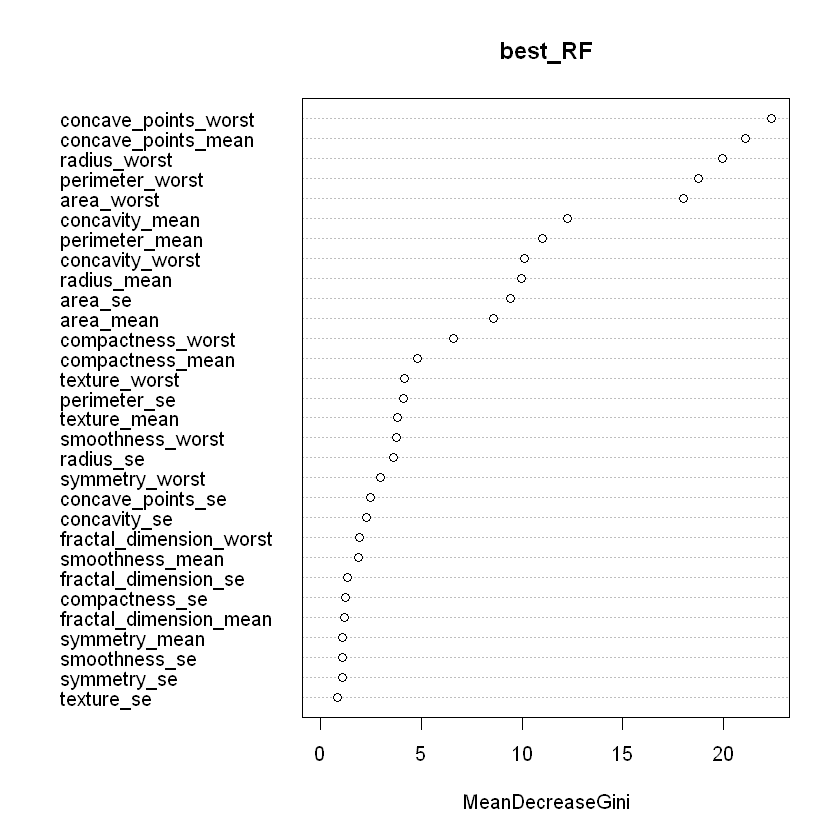

In [17]:
#importance(best_RF) 
varImpPlot(best_RF)

# Logistic Regression

## Data Preprocessing (Same as Random Forest)

In [81]:
breast_cancer = read.csv("data.csv")
breast_cancer$X <- NULL
breast_cancer$id <- NULL
head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [82]:
library(tidyverse)
colnames(breast_cancer) <- c('diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst')
head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [85]:
table(breast_cancer$diagnosis)


  B   M 
357 212 

# Resampling

In [121]:
library(ROSE)
bal_breast_cancer <- ovun.sample(diagnosis~., breast_cancer, method="both", N= 726)

In [122]:
bal_breast_cancer <- as.data.frame(bal_breast_cancer[3])
colnames(bal_breast_cancer) <- c('diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst')
head(bal_breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,12.900,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.03088,0.1778,⋯,14.48,21.82,97.17,643.8,0.1312,0.2548,0.2090,0.10120,0.3549,0.08118
2,B,13.340,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,⋯,15.53,23.19,96.66,614.9,0.1536,0.4791,0.4858,0.17080,0.3527,0.10160
3,B,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,⋯,11.14,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524
4,B,12.860,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,⋯,14.04,21.08,92.80,599.5,0.1547,0.2231,0.1791,0.11550,0.2382,0.08553
5,B,13.560,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.04451,0.1962,⋯,14.98,17.13,101.10,686.6,0.1376,0.2698,0.2577,0.09090,0.3065,0.08177
6,B,11.930,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.02008,0.1688,⋯,13.67,26.15,87.54,583.0,0.1500,0.2399,0.1503,0.07247,0.2438,0.08541


In [123]:
table(bal_breast_cancer$diagnosis)


  B   M 
365 361 

# Feature Scaling

In [130]:
X <- bal_breast_cancer[-1]
X_scaled <- scale(X)
X_scaled <- as.data.frame(X_scaled)
bal_breast_cancer <-cbind(X_scaled, bal_breast_cancer[1])

In [133]:
head(bal_breast_cancer)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-0.5378120,-0.8967186,-0.5309025,-0.5712439,-0.79079901,-0.3190129,-0.6824329,-0.6588054,-0.1769006,-0.01554274,⋯,-0.74594959,-0.4935940,-0.5699072,-0.1275590,-0.11035341,-0.4682223,-0.4284391,0.9915880,-0.18487136,B
2,-0.4200507,-0.9110280,-0.4239382,-0.5509461,0.79090054,0.8169393,0.1917154,0.3094963,0.4628494,0.94226413,⋯,-0.51672837,-0.5074300,-0.6137173,0.8852251,1.37408592,0.9451684,0.6022350,0.9555765,0.96343746,B
3,-1.4030892,-0.2837997,-1.3963410,-1.1518142,-0.58847986,-0.9512643,-0.9327408,-1.0497023,1.6175201,0.24006389,⋯,-0.11015349,-1.2068222,-0.9619240,-0.4802248,-0.77613404,-0.8833548,-0.9556229,0.3777555,0.04344078,B
4,-0.5485175,-1.5167923,-0.5666869,-0.5905009,1.21208539,-0.4502862,-0.8231507,-0.5813214,-1.0936155,0.33053141,⋯,-0.86976252,-0.6121489,-0.6370624,0.9349601,-0.32014711,-0.6208971,-0.2166770,-0.9186586,0.05974879,B
5,-0.3611701,-1.3784681,-0.3422563,-0.4434716,0.58782927,0.1498761,-0.3009255,-0.3203096,0.5408677,0.08210474,⋯,-1.53065583,-0.3869761,-0.5050259,0.1618079,-0.01108194,-0.2195513,-0.5809670,0.1993349,-0.15169299,B
6,-0.7974219,0.4412095,-0.8113435,-0.7627723,0.02975934,-0.6418481,-0.8838626,-0.9270193,-0.5279829,-0.07441842,⋯,-0.02147667,-0.7548488,-0.6620751,0.7224563,-0.20896306,-0.7679551,-0.8538883,-0.8269930,0.05300064,B


## Split Data

In [131]:
set.seed(1)
n = nrow(bal_breast_cancer) # 568
z = sample(n, 0.8*n) # 0.8 for train/ 0.2 for test

## Use step-forward variables selection
- When we do stepwise method, it has warning message. The reason might because we doesn't have balance data ot outliers.
- We can use SMOTE(oversampling/ undersampling) to fix unbalance.
- We also could consider to remove outliers.

In [140]:
full <- glm(as.factor(diagnosis)~., data= bal_breast_cancer, family = "binomial", maxit = 100)
null <- glm(as.factor(diagnosis)~1, data= bal_breast_cancer, family = "binomial", maxit = 100)

step(null, scope = list(lower = null, upper = full), method = "forward")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Start:  AIC=1008.43
as.factor(diagnosis) ~ 1



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                          Df Deviance     AIC
+ perimeter_worst          1   245.04  249.04
+ radius_worst             1   260.96  264.96
+ area_worst               1   263.12  267.12
+ concave_points_worst     1   299.89  303.89
+ concave_points_mean      1   349.48  353.48
+ perimeter_mean           1   382.90  386.90
+ area_mean                1   408.97  412.97
+ radius_mean              1   415.76  419.76
+ concavity_mean           1   470.68  474.68
+ area_se                  1   488.02  492.02
+ concavity_worst          1   509.80  513.80
+ perimeter_se             1   622.39  626.39
+ radius_se                1   643.57  647.57
+ compactness_worst        1   654.37  658.37
+ compactness_mean         1   690.95  694.95
+ texture_worst            1   808.23  812.23
+ texture_mean             1   844.34  848.34
+ smoothness_worst         1   848.48  852.48
+ symmetry_worst           1   859.03  863.03
+ concave_points_se        1   874.03  878.03
+ smoothness_mean          1   910

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ smoothness_worst         1   167.75  173.75
+ concave_points_worst     1   168.43  174.43
+ radius_mean              1   179.93  185.93
+ concavity_worst          1   184.40  190.40
+ texture_worst            1   186.24  192.24
+ fractal_dimension_worst  1   187.19  193.19
+ symmetry_worst           1   189.74  195.74
+ area_mean                1   193.26  199.26
+ compactness_worst        1   195.44  201.44
+ concavity_mean           1   196.34  202.34
+ perimeter_mean           1   196.35  202.35
+ smoothness_mean          1   196.36  202.36
+ concave_points_mean      1   198.27  204.27
+ fractal_dimension_mean   1   203.79  209.79
+ symmetry_mean            1   206.93  212.93
+ texture_mean             1   212.43  218.43
+ compactness_mean         1   214.66  220.66
+ smoothness_se            1   227.77  233.77
+ texture_se               1   233.95  239.95
+ symmetry_se              1   237.04  243.04
+ radius_se                1   237

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=173.75
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance    AIC
+ texture_worst            1   128.11 136.11
+ texture_mean             1   138.74 146.74
+ area_se                  1   153.80 161.80
+ radius_mean              1   154.30 162.30
+ area_worst               1   154.77 162.77
+ perimeter_mean           1   155.39 163.39
+ radius_se                1   155.67 163.67
+ texture_se               1   156.17 164.17
+ concave_points_worst     1   157.61 165.61
+ symmetry_worst           1   157.62 165.62
+ concavity_worst          1   158.50 166.50
+ concavity_mean           1   159.54 167.54
+ area_mean                1   159.86 167.86
+ perimeter_se             1   160.40 168.40
+ radius_worst             1   160.44 168.44
+ symmetry_mean            1   163.14 171.14
+ symmetry_se              1   163.19 171.19
+ concave_points_mean      1   164.93 172.93
<none>                         167.75 173.75
+ fractal_dimension_worst  1   165.94 173.94
+ concavity_se             1   166.03 174.03
+ compactn

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=136.11
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance    AIC
+ concave_points_worst     1   115.54 125.54
+ symmetry_worst           1   115.99 125.99
+ radius_mean              1   118.65 128.65
+ area_se                  1   118.78 128.78
+ radius_se                1   119.14 129.14
+ symmetry_mean            1   119.36 129.36
+ perimeter_mean           1   119.57 129.57
+ area_mean                1   121.63 131.63
+ concave_points_mean      1   121.85 131.85
+ area_worst               1   122.00 132.00
+ symmetry_se              1   122.16 132.16
+ concavity_worst          1   122.36 132.36
+ concavity_mean           1   122.39 132.39
+ radius_worst             1   123.42 133.42
+ perimeter_se             1   123.57 133.57
<none>                         128.11 136.11
+ texture_se               1   126.62 136.62
+ texture_mean             1   126.70 136.70
+ fractal_dimension_worst  1   126.83 136.83
+ smoothness_mean          1   127.04 137.04
+ concave_points_se        1   127.10 137.10
+ compactn

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=125.54
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance    AIC
+ area_worst               1   91.403 103.40
+ radius_worst             1   98.888 110.89
+ area_se                  1  101.659 113.66
+ radius_se                1  103.112 115.11
+ perimeter_mean           1  109.775 121.78
+ perimeter_se             1  110.050 122.05
+ radius_mean              1  110.773 122.77
+ compactness_mean         1  111.291 123.29
+ symmetry_worst           1  111.414 123.41
+ compactness_worst        1  112.163 124.16
+ compactness_se           1  112.776 124.78
+ area_mean                1  113.354 125.35
<none>                        115.540 125.54
+ fractal_dimension_se     1  113.563 125.56
+ symmetry_se              1  113.724 125.72
+ symmetry_mean            1  113.862 125.86
+ texture_se               1  114.918 126.92
+ fractal_dimension_mean   1  115.082 127.08
+ concavity_mean           1  115.164 127.16
+ fractal_dimension_worst  1  115.177 127.18
+ concave_points_mean      1  115.242 127.24
+ texture_

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=103.4
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst + area_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ radius_mean              1   81.078  95.078
+ area_mean                1   82.567  96.567
+ perimeter_mean           1   82.872  96.872
+ perimeter_se             1   83.538  97.538
+ radius_se                1   84.584  98.584
+ area_se                  1   84.760  98.760
<none>                         91.403 103.403
+ concavity_worst          1   89.727 103.727
+ concavity_mean           1   89.864 103.864
+ texture_mean             1   90.068 104.068
+ fractal_dimension_worst  1   90.287 104.287
+ symmetry_worst           1   90.422 104.422
+ symmetry_mean            1   90.877 104.877
+ compactness_worst        1   90.892 104.892
+ texture_se               1   90.944 104.944
+ symmetry_se              1   91.092 105.092
+ fractal_dimension_mean   1   91.105 105.105
+ concavity_se             1   91.204 105.204
+ fractal_dimension_se     1   91.225 105.225
+ smoothness_se            1   91.232 105.232
+ smoothness_mean          1   91.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=95.08
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ area_se                  1   70.016  86.016
+ radius_se                1   71.089  87.089
+ perimeter_se             1   71.392  87.392
+ concave_points_mean      1   75.346  91.346
+ texture_mean             1   76.279  92.279
+ concavity_mean           1   76.939  92.939
+ smoothness_se            1   77.450  93.450
+ concave_points_se        1   77.914  93.914
+ smoothness_mean          1   78.401  94.401
<none>                         81.078  95.078
+ perimeter_mean           1   79.152  95.152
+ concavity_se             1   79.218  95.218
- perimeter_worst          1   83.523  95.523
+ concavity_worst          1   79.528  95.528
+ symmetry_se              1   80.316  96.316
+ area_mean                1   80.339  96.339
+ compactness_se           1   80.448  96.448
+ compactness_worst        1   80.559  96.559
+ compactness_mean         1   80.617  96.617
+ texture_se               1   80.751  96.751
+ fractal_dimension_se     1   80.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=86.02
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ compactness_se           1   63.997  81.997
+ fractal_dimension_se     1   64.928  82.928
+ texture_se               1   65.040  83.040
- perimeter_worst          1   71.154  85.154
+ symmetry_se              1   67.647  85.647
<none>                         70.016  86.016
+ concave_points_se        1   68.204  86.204
+ compactness_mean         1   68.284  86.284
+ radius_worst             1   68.565  86.565
+ texture_mean             1   68.633  86.633
+ concavity_se             1   69.476  87.476
+ perimeter_mean           1   69.538  87.538
+ concavity_worst          1   69.561  87.561
+ fractal_dimension_mean   1   69.571  87.571
+ compactness_worst        1   69.629  87.629
+ area_mean                1   69.651  87.651
+ smoothness_mean          1   69.653  87.653
+ concave_points_mean      1   69.676  87.676
+ radius_se                1   69.820  87.820
+ concavity_mean           1   69.955  87.955
+ perimeter_se             1   69.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=82
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se + 
    compactness_se



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ texture_se               1   57.586  77.586
+ concavity_worst          1   58.991  78.991
- perimeter_worst          1   64.079  80.079
+ concavity_mean           1   60.194  80.194
+ texture_mean             1   61.310  81.310
+ perimeter_mean           1   61.583  81.583
+ perimeter_se             1   61.945  81.945
+ fractal_dimension_worst  1   61.986  81.986
<none>                         63.997  81.997
+ concavity_se             1   62.243  82.243
+ radius_worst             1   62.631  82.631
+ smoothness_se            1   62.730  82.730
+ symmetry_se              1   62.847  82.847
+ fractal_dimension_mean   1   62.928  82.928
+ concave_points_mean      1   63.190  83.190
+ radius_se                1   63.394  83.394
+ compactness_worst        1   63.419  83.419
+ symmetry_mean            1   63.492  83.492
+ area_mean                1   63.666  83.666
+ smoothness_mean          1   63.703  83.703
+ concave_points_se        1   63.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=77.59
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se + 
    compactness_se + texture_se



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ concavity_mean           1   42.088  64.088
+ concavity_worst          1   48.160  70.160
+ concavity_se             1   53.055  75.055
- perimeter_worst          1   58.026  76.026
+ concave_points_mean      1   54.179  76.179
+ perimeter_mean           1   54.620  76.620
<none>                         57.586  77.586
+ radius_worst             1   55.929  77.929
+ perimeter_se             1   56.176  78.176
+ smoothness_se            1   56.257  78.257
+ symmetry_se              1   56.747  78.747
+ fractal_dimension_worst  1   56.772  78.772
+ radius_se                1   56.789  78.789
+ fractal_dimension_mean   1   56.826  78.826
+ concave_points_se        1   57.004  79.004
+ symmetry_worst           1   57.173  79.173
+ smoothness_mean          1   57.213  79.213
+ area_mean                1   57.231  79.231
+ compactness_mean         1   57.317  79.317
+ symmetry_mean            1   57.379  79.379
+ fractal_dimension_se     1   57.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=64.09
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se + 
    compactness_se + texture_se + concavity_mean



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ radius_worst             1   35.967  59.967
+ symmetry_se              1   37.683  61.683
+ smoothness_se            1   38.628  62.628
+ perimeter_se             1   39.328  63.328
- perimeter_worst          1   43.857  63.857
<none>                         42.088  64.088
+ symmetry_worst           1   40.234  64.234
+ radius_se                1   40.288  64.288
+ concavity_se             1   40.401  64.401
+ symmetry_mean            1   40.616  64.616
+ fractal_dimension_se     1   40.706  64.706
+ concavity_worst          1   41.466  65.466
+ fractal_dimension_worst  1   41.562  65.562
+ area_mean                1   41.749  65.749
+ concave_points_mean      1   41.836  65.836
+ concave_points_se        1   41.966  65.966
+ smoothness_mean          1   41.966  65.966
+ fractal_dimension_mean   1   42.028  66.028
+ compactness_mean         1   42.035  66.035
+ perimeter_mean           1   42.051  66.051
+ texture_mean             1   42.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=59.97
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se + 
    compactness_se + texture_se + concavity_mean + radius_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ compactness_mean         1   29.106  55.106
+ radius_se                1   30.057  56.057
+ smoothness_mean          1   30.586  56.586
+ smoothness_se            1   30.979  56.979
+ concave_points_mean      1   31.844  57.844
- area_worst               1   37.011  59.011
+ area_mean                1   33.918  59.918
+ fractal_dimension_se     1   33.929  59.929
<none>                         35.967  59.967
+ symmetry_se              1   34.203  60.203
+ fractal_dimension_mean   1   34.692  60.692
+ perimeter_mean           1   34.872  60.872
+ compactness_worst        1   34.876  60.876
+ concave_points_se        1   35.159  61.159
+ concavity_worst          1   35.192  61.192
+ perimeter_se             1   35.590  61.590
+ symmetry_worst           1   35.620  61.620
+ concavity_se             1   35.714  61.714
+ symmetry_mean            1   35.759  61.759
+ fractal_dimension_worst  1   35.798  61.798
+ texture_mean             1   35.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=55.11
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se + 
    compactness_se + texture_se + concavity_mean + radius_worst + 
    compactness_mean



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ radius_se                1     0.00   28.00
+ fractal_dimension_worst  1     0.00   28.00
+ smoothness_mean          1     0.00   28.00
+ perimeter_se             1     0.00   28.00
+ fractal_dimension_mean   1     0.00   28.00
+ symmetry_se              1    18.32   46.32
+ concave_points_mean      1    24.07   52.07
+ symmetry_mean            1    24.29   52.29
+ symmetry_worst           1    24.88   52.88
- perimeter_worst          1    29.58   53.58
+ concavity_worst          1    27.05   55.05
<none>                          29.11   55.11
+ smoothness_se            1    27.54   55.54
- area_worst               1    31.66   55.66
+ concavity_se             1    27.91   55.91
+ texture_mean             1    28.64   56.64
+ fractal_dimension_se     1    28.71   56.71
+ area_mean                1    28.99   56.99
+ concave_points_se        1    29.09   57.09
- compactness_mean         1    35.97   59.97
- radius_worst             1    42

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=28
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se + 
    compactness_se + texture_se + concavity_mean + radius_worst + 
    compactness_mean + radius_se



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
- perimeter_worst          1     0.00   26.00
<none>                           0.00   28.00
+ fractal_dimension_worst  1     0.00   30.00
+ symmetry_se              1     0.00   30.00
+ fractal_dimension_mean   1     0.00   30.00
+ compactness_worst        1     0.00   30.00
+ smoothness_mean          1     0.00   30.00
+ symmetry_mean            1     0.00   30.00
+ perimeter_se             1     0.00   30.00
+ concavity_worst          1     0.00   30.00
+ texture_mean             1     0.00   30.00
+ area_mean                1     0.00   30.00
+ smoothness_se            1     0.00   30.00
+ fractal_dimension_se     1     0.00   30.00
- radius_se                1    29.11   55.11
- area_worst               1    29.90   55.90
- compactness_mean         1    30.06   56.06
- radius_worst             1    40.29   66.29
- smoothness_worst         1    40.85   66.85
- radius_mean              1    41.28   67.28
- compactness_se           1    44

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=26
as.factor(diagnosis) ~ smoothness_worst + texture_worst + concave_points_worst + 
    area_worst + radius_mean + area_se + compactness_se + texture_se + 
    concavity_mean + radius_worst + compactness_mean + radius_se



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
<none>                           0.00   26.00
+ fractal_dimension_worst  1     0.00   28.00
+ compactness_worst        1     0.00   28.00
+ symmetry_se              1     0.00   28.00
+ concavity_worst          1     0.00   28.00
+ perimeter_worst          1     0.00   28.00
+ smoothness_se            1     0.00   28.00
+ texture_mean             1     0.00   28.00
+ concave_points_se        1     0.00   28.00
+ perimeter_se             1     0.00   28.00
+ concave_points_mean      1     0.00   28.00
+ perimeter_mean           1     0.00   28.00
+ fractal_dimension_se     1     0.00   28.00
+ area_mean                1     0.00   28.00
- radius_se                1    29.58   53.58
- area_worst               1    34.33   58.33
- compactness_mean         1    36.94   60.94
- radius_worst             1    41.19   65.19
- smoothness_worst         1    42.83   66.83
- radius_mean              1    47.28   71.28
- area_se                  1    47


Call:  glm(formula = as.factor(diagnosis) ~ smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se + 
    compactness_se + texture_se + concavity_mean + radius_worst + 
    compactness_mean + radius_se, family = "binomial", data = bal_breast_cancer, 
    maxit = 100)

Coefficients:
         (Intercept)      smoothness_worst         texture_worst  
              2338.6                 966.6                2588.3  
concave_points_worst            area_worst           radius_mean  
              2634.2              -17516.4               -2493.8  
             area_se        compactness_se            texture_se  
             15798.1               -1564.7               -1981.4  
      concavity_mean          radius_worst      compactness_mean  
              3512.9               17278.4               -1375.9  
           radius_se  
             -4330.8  

Degrees of Freedom: 725 Total (i.e. Null);  713 Residual
Null Deviance:	    1006 
Residual

## Fit model
- Get error rate 0.6%

In [145]:
logit_train = glm(as.factor(diagnosis) ~ smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se + 
    compactness_se + texture_se + concavity_mean + radius_worst + 
    compactness_mean + radius_se, family = "binomial", data = bal_breast_cancer[z,], maxit = 100)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [146]:
thresh <- 0.5
pred.probs = predict(logit_train, type="response", newdata = bal_breast_cancer[-z,]) # probability
pred <- ifelse(pred.probs > thresh, 1, 0)

conf.mat <- table("Predicted"=pred, "Actual"=bal_breast_cancer[-z,]$diagnosis)
conf.mat # error rate = 1.7%

         Actual
Predicted  B  M
        0 77  0
        1  1 68

## Tuning model. Adjust threshold 

In [147]:
logit_train = glm(as.factor(diagnosis) ~ smoothness_worst + texture_worst + 
    concave_points_worst + area_worst + radius_mean + area_se + 
    compactness_se + texture_se + concavity_mean + radius_worst + 
    compactness_mean + radius_se, family = "binomial", data = bal_breast_cancer[z,], maxit = 100)

pred.probs = predict(logit_train, type="response", newdata = bal_breast_cancer[z,]) 


threshold = seq(0, 1, 0.01) # 0, 0.01, 0.02, ...1
err.rate = rep(0, 101)

for (k in 1:101){
  yhat = rep("A", length(z)) 
  yhat[pred.probs >= threshold[k]] = "M"
  yhat[pred.probs < threshold[k]] = "B"
  err.rate[k] = mean(yhat != bal_breast_cancer[z,]$diagnosis)
}

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [148]:
which.min(err.rate)

[1] 2

In [154]:
threshold[2] # threshold = 0.01
min(err.rate) # 0% error rate

[1] 0.01

[1] 0

## Test data
- Still have same error rate 1.7% as like before tuning.

In [155]:
thresh <- 0.01
pred.probs = predict(logit_train, type="response", newdata = bal_breast_cancer[-z,]) # probability
pred <- ifelse(pred.probs > thresh, 1, 0)

conf.mat <- table("Predicted"=pred, "Actual"= bal_breast_cancer[-z,]$diagnosis)
conf.mat # still same, error rate = 0.6%

         Actual
Predicted  B  M
        0 77  0
        1  1 68

## Result 

- In this data, Logistic Regression is better than Random Forest (error rate: 0.6% better than 4.4%). It is acceptable anwser beacuse usually we will choose logistic regression when we only have two labels on output variables. When we have more than two labels to classify, we would prefer to use decision tree/ LDA/ KNN or random forest.
- Random Forest model can build a robust model because Random Forest, unlike BAGGING, are trees de-correlated and prune the trees. On the other hand, BAGGING trees uses the entire feature so numbers of trees may be strongly correlated. In this project, after tuning, I have the best model with 3 variables tried to split in each nodes and 559 trees. Moreover, I find 'concave points worst' is the most important feature in the model. And 'concave points mean', 'radius worst', 'perimeter_worst', and 'area worst' are also important than remain variables.